<a href="https://colab.research.google.com/github/hkeremyanik/Assignment-10/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

worlds_fairs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-08-13/worlds_fairs.csv')

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [26]:
worlds_fairs.head(10)

,start_month,start_year,end_month,end_year,name_of_exposition,country,city,category,theme,notables,visitors,cost,area,attending_countries
0,4,1851,10,1851,The Great Exhibition,United Kingdom,London,World Expo,Industry of all Nations,The Crystal Palace,6.00,165.0,10.0,25.0
1,5,1855,11,1855,Exposition Universelle / Paris International,France,Paris,World Expo,"Agriculture, Industry and Arts","Palais d'Industrie, Bordeaux Wine classification",5.00,2.0,15.0,25.0
2,5,1862,11,1862,International Exhibition,United Kingdom,London,World Expo,Industry and Arts,NaN,6.00,2.0,15.0,39.0
3,4,1867,11,1867,Exposition Universelle / Paris International,France,Paris,World Expo,"Agriculture, Industry and Arts",Champ de Mars,15.00,45.0,69.0,42.0
4,5,1873,10,1873,Weltausstellung 1873 Wien / Austrian Internati...,Austria-Hungary,Vienna,World Expo,Culture and Education,Rotunde,7.25,95.0,233.0,35.0
5,5,1876,11,1876,Centennial Exposition,United States,Philadelphia,World Expo,"Arts, Manufactures and Products of the Soil an...","Centennial Arboretum, Telephone, Heinz Ketchup",10.00,8.0,115.0,35.0
6,5,1878,11,1878,Exposition Universelle / Paris International E...,France,Paris,World Expo,New Technologies,"Statue of Liberty, Telephone, Braille",16.00,11.0,75.0,36.0
7,10,1880,4,1881,Melbourne International Exhibition,Colony of Victoria,Melbourne,World Expo,"Arts, Manufacturing, Agriculture and Industria...",Royal Exhibition Buildings & Carlton Gardens,1.30,16.0,25.0,33.0
8,4,1888,12,1888,Exposición Universal de Barcelona (1888),Spain,Barcelona,World Expo,Fine and Industrial Art,"Arc de Triomf, Columbus Monument",2.30,17.0,47.0,30.0
9,5,1889,10,1889,Exposition Universelle / Paris International E...,France,Paris,World Expo,French Revolution,"Eiffel Tower, Annie Oakley",32.00,3.0,96.0,35.0


In [31]:
wolrds_fairs = worlds_fairs[worlds_fairs['visitors'] > 0]
wolrds_fairs = worlds_fairs[worlds_fairs['cost'] > 0]

In [32]:
worlds_fairs.visitors.values.reshape(-1,1)

array([[ 6.  ],
       [ 5.  ],
       [ 6.  ],
       [15.  ],
       [ 7.25],
       [10.  ],
       [16.  ],
       [ 1.3 ],
       [ 2.3 ],
       [32.  ],
       [27.5 ],
       [50.8 ],
       [19.69],
       [ 7.  ],
       [10.  ],
       [13.  ],
       [ 9.5 ],
       [19.  ],
       [ 5.8 ],
       [38.8 ],
       [20.  ],
       [31.  ],
       [45.  ],
       [41.  ],
       [ 9.6 ],
       [50.3 ],
       [ 6.4 ],
       [64.2 ],
       [ 5.6 ],
       [11.  ],
       [ 7.35],
       [22.11],
       [18.5 ],
       [18.1 ],
       [73.08],
       [ 8.2 ]])

In [34]:
worlds_fairs.cost.values.reshape(-1,1)

array([[1.650e+02],
       [2.000e+00],
       [2.000e+00],
       [4.500e+01],
       [9.500e+01],
       [8.000e+00],
       [1.100e+01],
       [1.600e+01],
       [1.700e+01],
       [3.000e+00],
       [2.700e+01],
       [1.875e+03],
       [3.150e+02],
       [2.900e+01],
       [2.600e+01],
       [3.500e+01],
       [3.300e+01],
       [2.580e+02],
       [2.500e+01],
       [4.290e+02],
       [1.970e+02],
       [1.400e+03],
       [5.000e+02],
       [2.500e+03],
       [4.700e+01],
       [4.310e+02],
       [1.560e+02],
       [3.000e+01],
       [7.840e+02],
       [4.200e+01],
       [3.500e+02],
       [3.110e+02],
       [6.250e+02],
       [3.400e+03],
       [4.200e+03],
       [1.769e+03]])

intercept
[-14.15009438]
coefficient_X
[28.18102948]


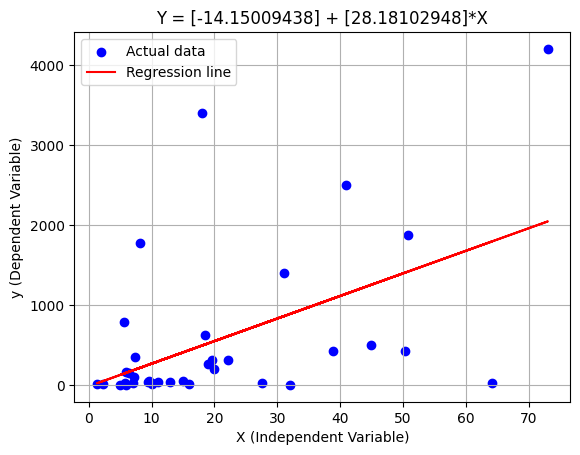

In [35]:
model = LinearRegression()
worlds_fairs = worlds_fairs.dropna(subset=['visitors', 'cost'])
X = worlds_fairs.visitors.values.reshape(-1, 1)
y = worlds_fairs.cost.values.reshape(-1, 1)

model.fit(X,y)

intercept = model.intercept_
coefficient = model.coef_[0]

print("intercept")
print(intercept)
print("coefficient_X")
print(coefficient)

y_pred = model.predict(X)

plot_equation = "Y = " + str(intercept) + " + " + str(coefficient) + "*X"

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title(plot_equation)
plt.legend()
plt.grid(True)
plt.show()

In [36]:
"Y = " + str(intercept) + " + " + str(coefficient) + "*X"

'Y = [-14.15009438] + [28.18102948]*X'

In [39]:
import numpy as np
np.mean(worlds_fairs.visitors)

np.float64(20.37166666666667)

/tmp/ipython-input-2385110471.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(worlds_fairs.visitors, worlds_fairs.cost , cmap='viridis')
/tmp/ipython-input-2385110471.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


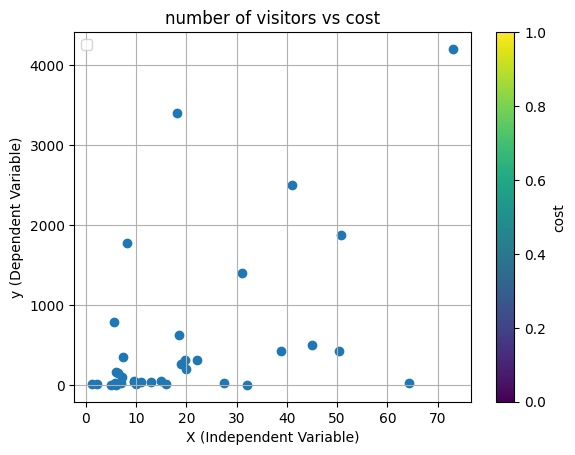

In [42]:
plt.scatter(worlds_fairs.visitors, worlds_fairs.cost , cmap='viridis')
plt.colorbar(label='cost')

plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title('number of visitors vs cost')
plt.legend()
plt.grid(True)
plt.show()

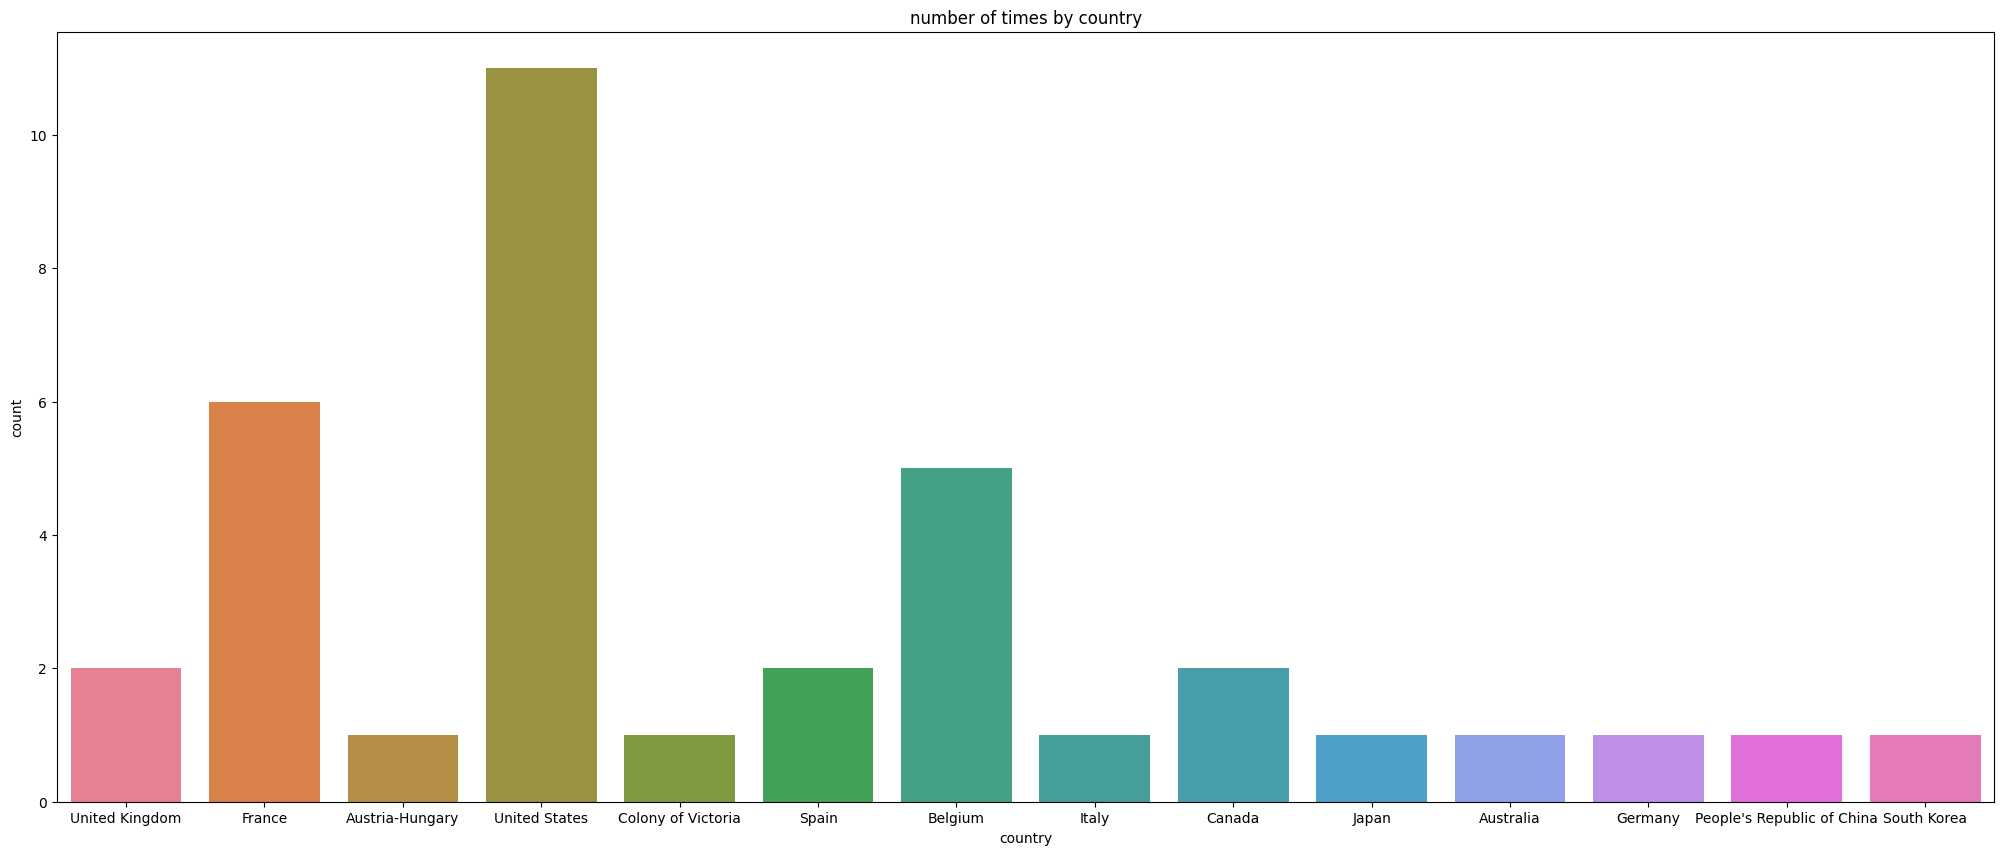

In [54]:
import seaborn as sns
plt.figure(figsize=(25, 10))
sns.countplot (x='country', data=worlds_fairs,hue="country") # For a vertical bar plot

plt.title('number of times by country')
plt.show()
